In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:
df = pd.read_csv('data.csv')
df.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [21]:
df.describe()

,Volume,Weight,CO2
count,36.000000,36.000000,36.000000
mean,1611.111111,1292.277778,102.027778
std,388.975047,242.123889,7.454571
min,900.000000,790.000000,90.000000
25%,1475.000000,1117.250000,97.750000
50%,1600.000000,1329.000000,99.000000
75%,2000.000000,1418.250000,105.000000
max,2500.000000,1746.000000,120.000000


In [17]:
cf = df[['Volume','CO2']]

In [19]:
cf.head()

,Volume,CO2
0,1000,99
1,1200,95
2,1000,95
3,900,90
4,1500,105


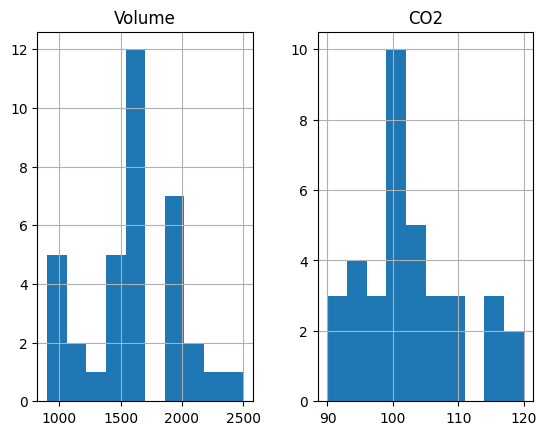

In [25]:
cf.hist()
plt.show()

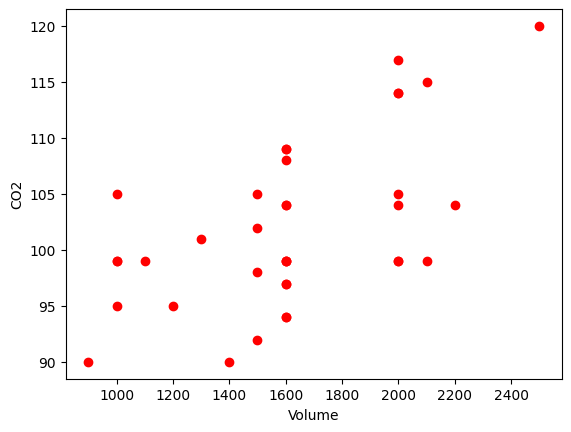

In [39]:
plt.scatter(cf.Volume,cf.CO2, color='red')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.show()

In [37]:
# splite data to train and test - 80% train and 20% test

mask = np.random.rand(len(cf)) < 0.8
train = cf[mask]
test = cf[~mask]

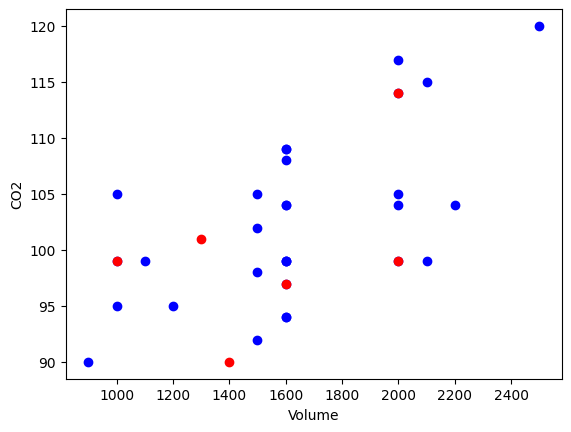

In [41]:
# show train and test scatter scatter

plt.scatter(train.Volume,train.CO2, color='blue')
plt.scatter(test.Volume,test.CO2, color='red')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.show()

In [44]:
# modeling

from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['Volume']])
train_y = np.asanyarray(train[['CO2']])

regr.fit(train_x, train_y)

print('Coefficients: ',regr.coef_)
print('Intercept: ',regr.intercept_)

Coefficients:  [[0.01155577]]
Intercept:  [83.67446539]


# The formula is :   y =  Coefficients * x + Intercept

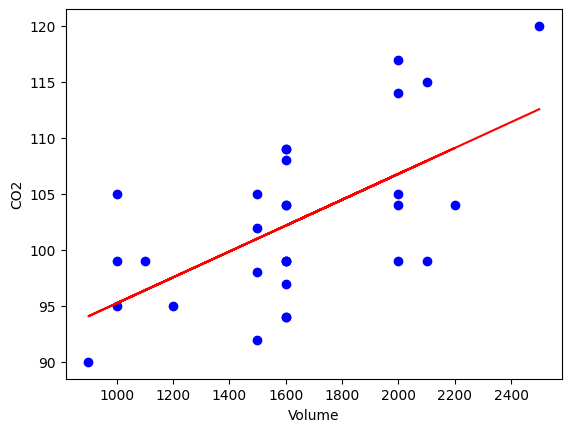

In [46]:
# show regression line

plt.scatter(train.Volume,train.CO2, color='blue')
plt.plot(train_x,regr.coef_[0][0] * train_x + regr.intercept_[0],'-r')
plt.xlabel('Volume')
plt.ylabel('CO2')
plt.show()

In [50]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(train[['Volume']])
test_y = np.asanyarray(train[['CO2']])

# this line return y value for x on regression line
test_y_ = regr.predict(test_x) 

print("Mean absoulute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of square (MSE) : %.2f" % np.mean(np.absolute(test_y_ - test_y) ** 2))

print("R2-score : %.2f" % r2_score(test_y , test_y_))

Mean absoulute error : 5.08
Residual sum of square (MSE) : 33.67
R2-score : 0.37
